# User Engagement

Measure the difference of user engagement after a new UI design

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.stats.api as sms
%matplotlib inline

In [165]:
df_t1 = pd.read_csv('t1_user_active_min.csv')
df_t2 = pd.read_csv('t2_user_variant.csv')
df_t3 = pd.read_csv('t3_user_active_min_pre.csv')
df_t4 = pd.read_csv('t4_user_attributes.csv')

In [166]:
df_t1.head()

,uid,dt,active_mins
0,0,2019-02-22,5.0
1,0,2019-03-11,5.0
2,0,2019-03-18,3.0
3,0,2019-03-22,4.0
4,0,2019-04-03,9.0


In [167]:
df_t1.describe()

,uid,active_mins
count,1.066402e+06,1.066402e+06
mean,2.422100e+04,3.616809e+01
std,1.417358e+04,1.270484e+03
min,0.000000e+00,1.000000e+00
25%,1.202000e+04,2.000000e+00
50%,2.394100e+04,5.000000e+00
75%,3.618100e+04,1.700000e+01
max,4.999900e+04,9.999900e+04


In [168]:
df_t2.head()

,uid,variant_number,dt,signup_date
0,0,0,2019-02-06,2018-09-24
1,1,0,2019-02-06,2016-11-07
2,2,0,2019-02-06,2018-09-17
3,3,0,2019-02-06,2018-03-04
4,4,0,2019-02-06,2017-03-09


In [169]:
df_t2.describe()

,uid,variant_number
count,50000.000000,50000.000000
mean,24999.500000,0.200000
std,14433.901067,0.400004
min,0.000000,0.000000
25%,12499.750000,0.000000
50%,24999.500000,0.000000
75%,37499.250000,0.000000
max,49999.000000,1.000000


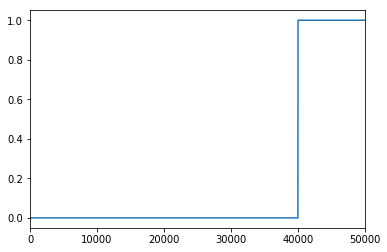

In [170]:
df_t2['variant_number'].plot()

In [171]:
print(len(df_t1))

1066402


In [172]:
# remove outliers

df_t1['z_score'] = np.abs(stats.zscore(df_t1['active_mins']))
df_t1 = df_t1[df_t1['z_score']<3]
print(len(df_t1))

1066230


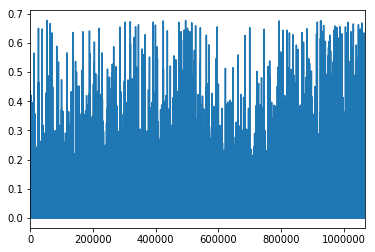

In [173]:
df_t1['z_score'].plot()

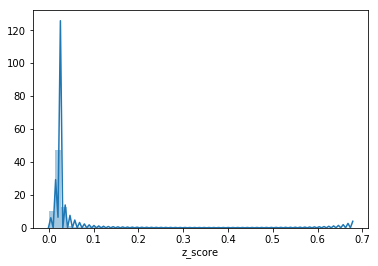

In [174]:
sns.distplot(df_t1['z_score'])

In [175]:
# df1 groupby id
df_t1_grouped = df_t1.groupby(['uid'],as_index=False)
df_t1_sum = df_t1_grouped.sum()
df_t1_sum.head()

,uid,active_mins,z_score
0,0,43.0,0.336238
1,1,15205.0,9.393575
2,2,17.0,0.185895
3,3,77.0,0.622625
4,4,39.0,0.538663


In [176]:
df_t1_sum.describe()

,uid,active_mins,z_score
count,46633.000000,46633.000000,46633.000000
mean,24922.194433,458.256964,0.606700
std,14416.635209,1658.819943,1.041860
min,0.000000,1.000000,0.000132
25%,12446.000000,18.000000,0.145621
50%,24898.000000,55.000000,0.347258
75%,37374.000000,199.000000,0.758536
max,49999.000000,46742.000000,33.915468


In [177]:
# df_t1_sum.dtypes

In [178]:
# df_t2.dtypes

In [179]:
# sns.distplot(df_t1_sum['active_mins'])

# t-test using table 1 & 2

In [180]:
# combine df_t1_sum with df_t2
df_t12 = pd.merge(df_t1_sum,df_t2,how = 'right',on = 'uid')
df_t12.head()

,uid,active_mins,z_score,variant_number,dt,signup_date
0,0,43.0,0.336238,0,2019-02-06,2018-09-24
1,1,15205.0,9.393575,0,2019-02-06,2016-11-07
2,2,17.0,0.185895,0,2019-02-06,2018-09-17
3,3,77.0,0.622625,0,2019-02-06,2018-03-04
4,4,39.0,0.538663,0,2019-02-06,2017-03-09


In [181]:
df_t12.shape

(50000, 6)

In [182]:
df_t12_nan = df_t12.dropna(subset=['active_mins'])

In [183]:
df_t12_nan.head()

,uid,active_mins,z_score,variant_number,dt,signup_date
0,0,43.0,0.336238,0,2019-02-06,2018-09-24
1,1,15205.0,9.393575,0,2019-02-06,2016-11-07
2,2,17.0,0.185895,0,2019-02-06,2018-09-17
3,3,77.0,0.622625,0,2019-02-06,2018-03-04
4,4,39.0,0.538663,0,2019-02-06,2017-03-09


In [184]:
df_t12_nan.shape

(46633, 6)

In [185]:
df_t12_nan[-5:]

,uid,active_mins,z_score,variant_number,dt,signup_date
46628,49995,95.0,0.437649,1,2019-02-06,2018-10-11
46629,49996,156.0,0.247296,1,2019-02-06,2014-12-06
46630,49997,379.0,1.210492,1,2019-02-06,2018-11-15
46631,49998,597.0,0.654109,1,2019-02-06,2016-04-05
46632,49999,39.0,0.140111,1,2019-02-06,2015-12-29


In [186]:
X1_0 = df_t12_nan[df_t12_nan['variant_number']==0]['active_mins']
X1_1 = df_t12_nan[df_t12_nan['variant_number']==1]['active_mins']

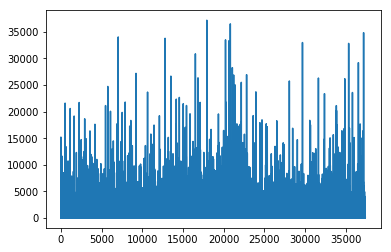

In [187]:
plt.plot(X1_0)

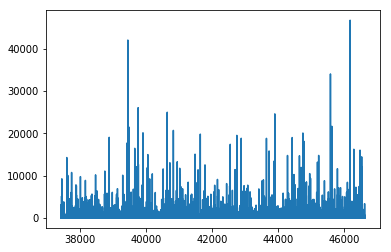

In [188]:
plt.plot(X1_1)

In [189]:
print(X1_0.mean(),X1_1.mean())

458.2211623246493 458.4024761077324


In [344]:
stats.ttest_ind(X1_1,X1_0,equal_var = False,nan_policy='omit')

Ttest_indResult(statistic=0.04702697348305371, pvalue=0.9624924081180158)

In [343]:
# confidence interval of t-test
cm1 = sms.CompareMeans(sms.DescrStatsW(X1_1), sms.DescrStatsW(X1_0))
cm1.tconfint_diff(alpha=0.05,alternative='two-sided',usevar='unequal')

(-37.43943956796715, 39.280070760467304)

In [192]:
cm1.ttest_ind(usevar='unequal')

(-0.009303964709989936, 0.9925767506273644, 13920.469441655147)

# t-test using table 1, 2, & 3

In [193]:
df_t3.head()

,uid,dt,active_mins
0,0,2018-09-24,3.0
1,0,2018-11-08,4.0
2,0,2018-11-24,3.0
3,0,2018-11-28,6.0
4,0,2018-12-02,6.0


In [195]:
print(len(df_t3))

1190093


In [196]:
# delete outliers in table 3
df_t3['z_score'] = np.abs(stats.zscore(df_t3['active_mins']))
# remove outliers
df_t3 = df_t3[df_t3['z_score']<3]
print(len(df_t3))

1189927


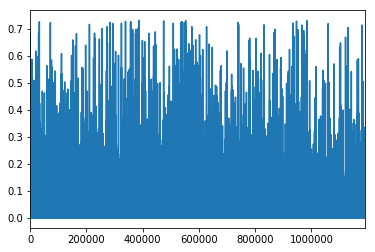

In [197]:
df_t3['z_score'].plot()

In [198]:
# calculate sum
df_t3_grouped = df_t3.groupby(['uid'],as_index=False)
df_t3_sum = df_t3_grouped.sum()
df_t3_sum.head()

,uid,active_mins,z_score
0,0,70.0,0.513120
1,1,19158.0,13.101561
2,2,37.0,0.241239
3,3,108.0,0.437952
4,4,66.0,0.707293


In [199]:
df_t3_sum = df_t3_sum.rename(columns = {"active_mins":"active_mins_pre","z_score":"z_score_pre"})

In [200]:
# combine table 2 and table 3
df_t123 = pd.merge(df_t12,df_t3_sum,how = 'left',on = 'uid')
df_t123.head()

,uid,active_mins,z_score,variant_number,dt,signup_date,active_mins_pre,z_score_pre
0,0,43.0,0.336238,0,2019-02-06,2018-09-24,70.0,0.513120
1,1,15205.0,9.393575,0,2019-02-06,2016-11-07,19158.0,13.101561
2,2,17.0,0.185895,0,2019-02-06,2018-09-17,37.0,0.241239
3,3,77.0,0.622625,0,2019-02-06,2018-03-04,108.0,0.437952
4,4,39.0,0.538663,0,2019-02-06,2017-03-09,66.0,0.707293


In [201]:
print(len(df_t123))

50000


In [202]:
df_t123_nan = df_t123.dropna(subset=['active_mins','active_mins_pre'])
print(len(df_t123_nan))

46478


In [203]:
df_t123_nan[-5:]

,uid,active_mins,z_score,variant_number,dt,signup_date,active_mins_pre,z_score_pre
46628,49995,95.0,0.437649,1,2019-02-06,2018-10-11,34.0,0.325545
46629,49996,156.0,0.247296,1,2019-02-06,2014-12-06,243.0,0.793807
46630,49997,379.0,1.210492,1,2019-02-06,2018-11-15,83.0,0.556628
46631,49998,597.0,0.654109,1,2019-02-06,2016-04-05,124.0,0.549182
46632,49999,39.0,0.140111,1,2019-02-06,2015-12-29,77.0,0.071108


In [204]:
X1_0 = df_t123_nan[df_t123_nan['variant_number']==0]['active_mins']
X1_1 = df_t123_nan[df_t123_nan['variant_number']==1]['active_mins']

In [205]:
X3_0 = df_t123_nan[df_t123_nan['variant_number']==0]['active_mins_pre']
X3_1 = df_t123_nan[df_t123_nan['variant_number']==1]['active_mins_pre']

In [206]:
print(len(X1_1),len(X3_1))

9165 9165


In [207]:
print(X1_0.mean(),X3_0.mean())

459.54482351995284 506.8402701471337


In [208]:
print(X1_1.mean(),X3_1.mean())

460.4651391162029 295.81102018548825


Compare pre- and post- treatment active minutes for controled group 

In [345]:
# confidence interval of t-test 
cm31_0 = sms.CompareMeans(sms.DescrStatsW(X1_0), sms.DescrStatsW(X3_0))
cm31_0.tconfint_diff(alpha=0.05,alternative='two-sided',usevar='unequal')

(-72.6748790597489, -21.91601419461283)

In [346]:
cm31_0.ttest_ind(usevar='unequal')

(-3.652520550489233, 0.0002598590729211633, 73501.22033700194)

In [347]:
stats.ttest_ind(X1_0,X3_0,equal_var = False,nan_policy='omit')

Ttest_indResult(statistic=-3.652520550489233, pvalue=0.0002598590729211633)

Compare pre- and post- treatment active minutes for treatment group 

In [348]:
cm31_1 = sms.CompareMeans(sms.DescrStatsW(X1_1), sms.DescrStatsW(X3_1))
cm31_1.tconfint_diff(alpha=0.05,alternative='two-sided',usevar='unequal')

(123.25398503564992, 206.05425282577943)

In [349]:
cm31_1.ttest_ind(usevar='unequal')

(7.795642865621355, 6.802272221823442e-15, 15934.188601640477)

In [350]:
stats.ttest_ind(X1_1,X3_1,equal_var = False,nan_policy='omit')

Ttest_indResult(statistic=7.795642865621355, pvalue=6.802272221823442e-15)

# Deep Dive

In [216]:
# combine table 1,2,3,and 4
df_t1234 = pd.merge(df_t123,df_t4,how = 'left',on = 'uid')
df_t1234.head()

,uid,active_mins,z_score,variant_number,dt,signup_date,active_mins_pre,z_score_pre,gender,user_type
0,0,43.0,0.336238,0,2019-02-06,2018-09-24,70.0,0.513120,male,non_reader
1,1,15205.0,9.393575,0,2019-02-06,2016-11-07,19158.0,13.101561,male,reader
2,2,17.0,0.185895,0,2019-02-06,2018-09-17,37.0,0.241239,male,non_reader
3,3,77.0,0.622625,0,2019-02-06,2018-03-04,108.0,0.437952,male,non_reader
4,4,39.0,0.538663,0,2019-02-06,2017-03-09,66.0,0.707293,male,non_reader


In [368]:
df_t4[df_t4['user_type']=='contributor'].count()

uid          1044
gender       1044
user_type    1044
dtype: int64

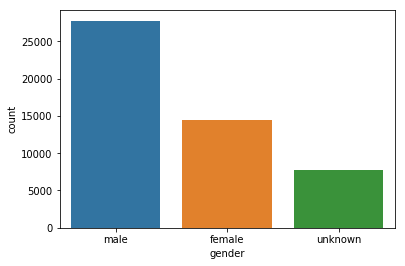

In [217]:
sns.countplot(x='gender',data=df_t1234)

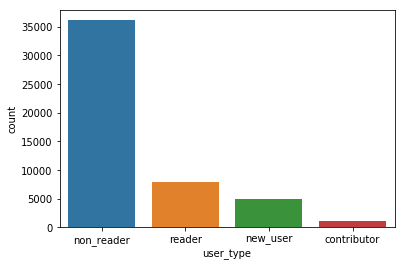

In [218]:
sns.countplot(x='user_type',data=df_t1234)

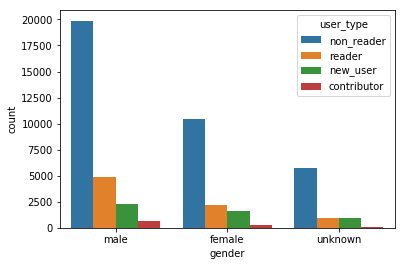

In [219]:
sns.countplot(x='gender',hue = 'user_type',data=df_t1234)

In [220]:
# treated
df_t1234_t = df_t1234[df_t1234['variant_number']==1]

In [221]:
df_t1234_t.head()

,uid,active_mins,z_score,variant_number,dt,signup_date,active_mins_pre,z_score_pre,gender,user_type
37425,40000,25.0,0.065726,1,2019-02-06,2019-02-04,NaN,NaN,male,new_user
37426,40001,299.0,0.675632,1,2019-02-06,2017-04-29,125.0,0.548336,male,non_reader
37427,40002,183.0,0.596128,1,2019-02-06,2015-08-22,90.0,0.550703,male,non_reader
37428,40004,56.0,0.212134,1,2019-02-06,2015-04-12,10.0,0.182325,female,non_reader
37429,40005,289.0,0.797375,1,2019-02-06,2017-03-05,638.0,1.269502,female,non_reader


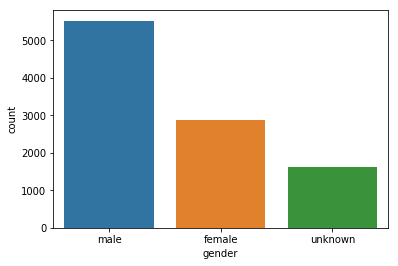

In [222]:
sns.countplot(x='gender',data=df_t1234_t)

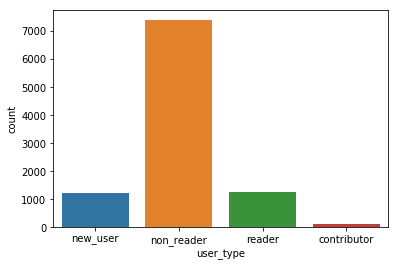

In [223]:
sns.countplot(x='user_type',data=df_t1234_t)

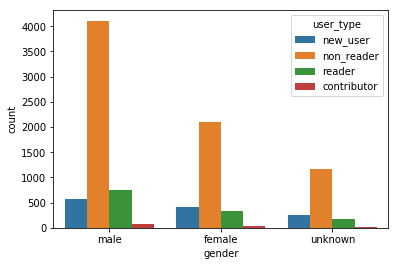

In [224]:
sns.countplot(x='gender',hue = 'user_type',data=df_t1234_t)

In [225]:
df_t1234_t.head()

,uid,active_mins,z_score,variant_number,dt,signup_date,active_mins_pre,z_score_pre,gender,user_type
37425,40000,25.0,0.065726,1,2019-02-06,2019-02-04,NaN,NaN,male,new_user
37426,40001,299.0,0.675632,1,2019-02-06,2017-04-29,125.0,0.548336,male,non_reader
37427,40002,183.0,0.596128,1,2019-02-06,2015-08-22,90.0,0.550703,male,non_reader
37428,40004,56.0,0.212134,1,2019-02-06,2015-04-12,10.0,0.182325,female,non_reader
37429,40005,289.0,0.797375,1,2019-02-06,2017-03-05,638.0,1.269502,female,non_reader


In [369]:
df_t1234_t[df_t1234_t['user_type']=='contributor'].count()

uid                129
active_mins        127
z_score            127
variant_number     129
dt                 129
signup_date        129
active_mins_pre    129
z_score_pre        129
gender             129
user_type          129
dtype: int64

t-tests

In [228]:
df_di = df_t1234.drop(columns = ['dt','signup_date','z_score','z_score_pre'])
df_di.head()

,uid,active_mins,variant_number,active_mins_pre,gender,user_type
0,0,43.0,0,70.0,male,non_reader
1,1,15205.0,0,19158.0,male,reader
2,2,17.0,0,37.0,male,non_reader
3,3,77.0,0,108.0,male,non_reader
4,4,39.0,0,66.0,male,non_reader


In [229]:
df_di = pd.get_dummies(df_di)
df_di.head()

,uid,active_mins,variant_number,active_mins_pre,gender_female,gender_male,gender_unknown,user_type_contributor,user_type_new_user,user_type_non_reader,user_type_reader
0,0,43.0,0,70.0,0,1,0,0,0,1,0
1,1,15205.0,0,19158.0,0,1,0,0,0,0,1
2,2,17.0,0,37.0,0,1,0,0,0,1,0
3,3,77.0,0,108.0,0,1,0,0,0,1,0
4,4,39.0,0,66.0,0,1,0,0,0,1,0


In [365]:
df_di['user_type_contributor'].count()

AttributeError: 'Int64Index' object has no attribute 'levels'

In [230]:
df_di.dropna(subset=['active_mins','active_mins_pre'],inplace = True)

In [289]:
stats_di = []
print(stats_di[:2])

[]


Gender: male

In [290]:
idx = (df_di['variant_number']==0) & (df_di['gender_male'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean of male without treatment: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'male',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean of male without treatment: 602.397212543554, 555.5939573290058
p-value:0.016467410365490737


In [291]:
print(stats_di)

[[0, 'male', -46.803255214548244, 0.016467410365490737]]


In [292]:
# treatment
idx = (df_di['variant_number']==1) & (df_di['gender_male'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean of male without treatment: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'male',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean of male without treatment: 341.80054644808746, 534.5480093676815
p-value:1.7600610401407062e-09


In [293]:
print(stats_di)

[[0, 'male', -46.803255214548244, 0.016467410365490737], [1, 'male', 192.74746291959406, 1.7600610401407062e-09]]


Gender:Female

In [294]:
idx = (df_di['variant_number']==0) & (df_di['gender_female'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'female',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean: 388.0013085335078, 347.29563510608466
p-value:0.03683908680646737


In [295]:
idx = (df_di['variant_number']==1) & (df_di['gender_female'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'female',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean: 224.61574074074073, 355.52777777777777
p-value:1.2670504456974684e-05


Gender:Unknown

In [296]:
idx = (df_di['variant_number']==0) & (df_di['gender_unknown'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'unknown',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 377.8352463358644, 316.2689387250574
p-value:0.018511537943603502


In [297]:
idx = (df_di['variant_number']==1) & (df_di['gender_unknown'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean treated group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'unknown',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean treated group: 260.5369220151829, 386.2049689440994
p-value:0.006611247561988228


User Type: Contributor

In [298]:
idx = (df_di['variant_number']==0) & (df_di['user_type_contributor'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'Contributor',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 4967.09220636663, 4309.835345773875
p-value:0.029845033006230495


In [299]:
idx = (df_di['variant_number']==1) & (df_di['user_type_contributor'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'Contributor',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 3231.299212598425, 4708.031496062992
p-value:0.06580880513818083


User Type: New User

In [300]:
idx = (df_di['variant_number']==0) & (df_di['user_type_new_user'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'New User',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 6.105562855891371, 29.132720105124836
p-value:1.0159524413376105e-12


In [301]:
idx = (df_di['variant_number']==1) & (df_di['user_type_new_user'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'New User',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 6.487012987012987, 54.62337662337662
p-value:5.585057715892592e-10


User Type: Non-Reader

In [302]:
idx = (df_di['variant_number']==0) & (df_di['user_type_non_reader'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'Non-Reader',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 108.01035211781002, 104.92367135671066
p-value:0.2667925473559042


In [303]:
idx = (df_di['variant_number']==1) & (df_di['user_type_non_reader'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'Non-Reader',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 99.44206621004567, 164.45462328767124
p-value:6.108660456222139e-29


User Type: Reader

In [304]:
idx = (df_di['variant_number']==0) & (df_di['user_type_reader'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([0,'Reader',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 1706.7486910994764, 1537.135377711294
p-value:0.00021751295197818286


In [305]:
idx = (df_di['variant_number']==1) & (df_di['user_type_reader'] == 1)
X1 = df_di[idx]['active_mins_pre']
X2 = df_di[idx]['active_mins']
print("Pre & Post mean controled group: {}, {}".format(X1.mean(),X2.mean()))
t_stat,p_value = stats.ttest_ind(X1,X2,equal_var = False,nan_policy='omit')
print("p-value:{}".format(p_value))
stats_di.append([1,'Reader',-(X1.mean()-X2.mean()),p_value])

Pre & Post mean controled group: 1268.926984126984, 1926.734126984127
p-value:3.2363279209316743e-10


In [307]:
df_stats = pd.DataFrame(stats_di,columns = ['variant_number','group','diff_mean','p_value'])

In [355]:
df_stats['p_sign'] = [1 if i < 0.01 else 0 for i in df_stats['p_value']]

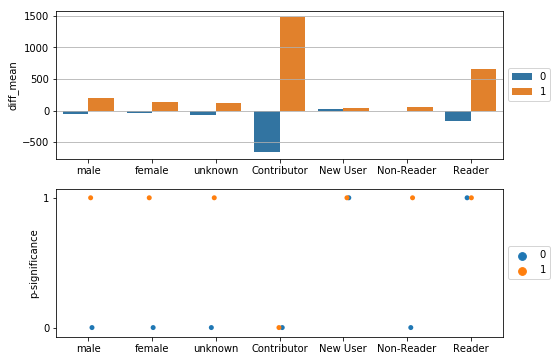

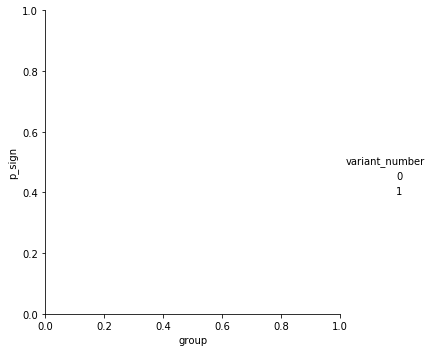

In [361]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6))
sns.barplot(x = 'group',y='diff_mean',hue = 'variant_number',data = df_stats,ax =ax1)
ax1.set_xlabel('')
ax1.grid(axis = 'y')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax1.set_yscale('log')
sns.catplot(x = 'group',y='p_sign',hue = 'variant_number',data = df_stats,ax =ax2)
ax2.set_ylabel('p-significance')
ax2.set_xlabel('')
ax2.set_yticks([0,1])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [335]:
# fig, ax = plt.subplots(figsize=(10,5))
# sns.barplot(x = 'group',y='p_value',hue = 'variant_number',data = df_stats,ax =ax)

In [336]:
# fig, ax = plt.subplots(figsize=(8,5))
